In [ ]:
!pip install pandas numpy matplotlib tqdm fastdtw seaborn networkx
!pip install scikit-learn
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512411 sha256=f82568a5057f10d15c7986eedcf279662f7de964a464775a7139c41cf98c5b4b
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 53.1 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 45.6 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.9 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-_43lga03
  Running command git clone --filter=blob:none --q

In [ ]:
import sys
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr, zscore, rankdata
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch_geometric.data import Data, Batch
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GATConv, global_mean_pool
from torch_geometric.nn import global_mean_pool
from torch_geometric.utils import from_networkx, add_self_loops, to_undirected
from tqdm import tqdm
from torch.utils.data import Dataset
from torch_geometric.data import Dataset
from torch.nn import (BatchNorm1d, Dropout, Linear,
                      Module)
from torch_geometric.nn import (GCNConv, GATConv, SAGEConv, GlobalAttention,
                                global_mean_pool, ChebConv, MessagePassing)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lines = []
with open('/content/drive/MyDrive/EP1.01.txt', 'r') as file:
    for line in file:
        lines.append(line)
print(len(lines))

910476


In [ ]:
print(lines[0])
print(lines[1])
print(lines[2])
print(lines[3])
print(lines[4])

67635	67635	EP	AF3	6	260	4395.384615,4382.564102,4377.435897,4387.179487,4395.897435,4398.461538,4396.923076,4391.794871,4391.282051,4395.897435,4398.974358,4396.410256,4392.820512,4392.820512,4395.384615,4398.974358,4394.358974,4381.538461,4376.410256,4383.589743,4387.179487,4388.717948,4397.948717,4401.538461,4397.948717,4398.974358,4398.974358,4395.897435,4396.923076,4398.461538,4397.948717,4396.410256,4391.794871,4389.743589,4389.743589,4385.641025,4387.692307,4393.846153,4389.743589,4381.025641,4377.948717,4378.461538,4377.435897,4385.128205,4393.333333,4389.230769,4382.564102,4378.974358,4375.384615,4378.461538,4386.153846,4389.230769,4393.846153,4390.256410,4374.871794,4367.692307,4374.871794,4384.615384,4390.769230,4394.358974,4390.769230,4382.051282,4381.025641,4385.641025,4376.923076,4365.641025,4373.333333,4377.948717,4365.128205,4363.589743,4375.897435,4374.358974,4368.205128,4373.333333,4378.461538,4375.897435,4374.358974,4376.410256,4377.435897,4376.410256,4370.256410,437

In [ ]:
split_ = lines[0].split()
for i in range(len(split_)):
    print(i, split_[i])

0 67635
1 67635
2 EP
3 AF3
4 6
5 260
6 4395.384615,4382.564102,4377.435897,4387.179487,4395.897435,4398.461538,4396.923076,4391.794871,4391.282051,4395.897435,4398.974358,4396.410256,4392.820512,4392.820512,4395.384615,4398.974358,4394.358974,4381.538461,4376.410256,4383.589743,4387.179487,4388.717948,4397.948717,4401.538461,4397.948717,4398.974358,4398.974358,4395.897435,4396.923076,4398.461538,4397.948717,4396.410256,4391.794871,4389.743589,4389.743589,4385.641025,4387.692307,4393.846153,4389.743589,4381.025641,4377.948717,4378.461538,4377.435897,4385.128205,4393.333333,4389.230769,4382.564102,4378.974358,4375.384615,4378.461538,4386.153846,4389.230769,4393.846153,4390.256410,4374.871794,4367.692307,4374.871794,4384.615384,4390.769230,4394.358974,4390.769230,4382.051282,4381.025641,4385.641025,4376.923076,4365.641025,4373.333333,4377.948717,4365.128205,4363.589743,4375.897435,4374.358974,4368.205128,4373.333333,4378.461538,4375.897435,4374.358974,4376.410256,4377.435897,4376.410256,4

In [ ]:
event = []
digit = []
pos = []
data = []
line_counter = 0

data_df = pd.DataFrame(columns=['event', 'digit', 'pos', 'data'])

for line in tqdm(lines):
    if line_counter<140_000_000:
        split_line = line.split()
        event.append(split_line[1])
        digit.append(split_line[4])
        pos.append(split_line[3])
        data.append(split_line[6])
        line_counter+=1

data_df['event'] = event
data_df['digit'] = digit
data_df['pos'] = pos
data_df['data'] = data

num_events = data_df['event'].unique()
print(len(num_events))

del lines, event, digit, pos, data, num_events

print(data_df.head())
print(data_df.shape)

100%|██████████| 910476/910476 [00:05<00:00, 158542.48it/s]


65034
   event digit  pos                                               data
0  67635     6  AF3  4395.384615,4382.564102,4377.435897,4387.17948...
1  67635     6   F7  4489.230769,4475.384615,4474.358974,4486.66666...
2  67635     6   F3  4538.461538,4528.717948,4524.615384,4526.15384...
3  67635     6  FC5  4207.692307,4205.641025,4200.512820,4194.35897...
4  67635     6   T7  4497.948717,4498.461538,4494.871794,4497.94871...
(910476, 4)


In [ ]:
def process_data(x):
    data_list = [float(i) for i in x.split(',')]
    if len(data_list) < 240:
        return None
    return data_list[:240]

In [ ]:
print(data_df['data'].values)

['4395.384615,4382.564102,4377.435897,4387.179487,4395.897435,4398.461538,4396.923076,4391.794871,4391.282051,4395.897435,4398.974358,4396.410256,4392.820512,4392.820512,4395.384615,4398.974358,4394.358974,4381.538461,4376.410256,4383.589743,4387.179487,4388.717948,4397.948717,4401.538461,4397.948717,4398.974358,4398.974358,4395.897435,4396.923076,4398.461538,4397.948717,4396.410256,4391.794871,4389.743589,4389.743589,4385.641025,4387.692307,4393.846153,4389.743589,4381.025641,4377.948717,4378.461538,4377.435897,4385.128205,4393.333333,4389.230769,4382.564102,4378.974358,4375.384615,4378.461538,4386.153846,4389.230769,4393.846153,4390.256410,4374.871794,4367.692307,4374.871794,4384.615384,4390.769230,4394.358974,4390.769230,4382.051282,4381.025641,4385.641025,4376.923076,4365.641025,4373.333333,4377.948717,4365.128205,4363.589743,4375.897435,4374.358974,4368.205128,4373.333333,4378.461538,4375.897435,4374.358974,4376.410256,4377.435897,4376.410256,4370.256410,4370.769230,4380.000000,43

In [ ]:
data_df['data'] = data_df['data'].apply(process_data)
data_df = data_df.dropna(subset=['data'])

data_df['event'] = data_df['event'].apply(float)
data_df['digit'] = data_df['digit'].apply(float)
data_df['digit'] = data_df['digit'].apply(lambda x: 10 if x == -1 else x)

# scaler = StandardScaler()
# data_df['data'] = data_df['data'].apply(lambda x: scaler.fit_transform(np.array(x).reshape(-1, 1)).flatten())

# all_data = np.concatenate(data_df['data'].values)
# all_data_reshaped = all_data.reshape(-1, 1)
# scaler = StandardScaler()
# scaler.fit(all_data_reshaped)
# data_df['data'] = data_df['data'].apply(lambda x: scaler.transform(np.array(x).reshape(-1, 1)).flatten())

all_data = np.concatenate(data_df['data'].values)
all_data_reshaped = all_data.reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(all_data_reshaped)
data_df['data'] = data_df['data'].apply(lambda x: scaler.transform(np.array(x).reshape(-1, 1)).flatten())


# data_df.to_csv('data_df.csv')

print(data_df.head(28))
print(data_df.shape)
del all_data


      event  digit  pos                                               data
0   67635.0    6.0  AF3  [0.5920576545391364, 0.5890726462446788, 0.587...
1   67635.0    6.0   F7  [0.613907914984484, 0.6106841060357829, 0.6104...
2   67635.0    6.0   F3  [0.6253703466209978, 0.6231017402892703, 0.622...
3   67635.0    6.0  FC5  [0.5483571336484414, 0.5478795323399545, 0.546...
4   67635.0    6.0   T7  [0.6159377204291377, 0.6160571208726745, 0.615...
5   67635.0    6.0   P7  [0.5472825308207613, 0.5448945240454968, 0.545...
6   67635.0    6.0   O1  [0.5472825308207613, 0.5450139244890336, 0.545...
7   67635.0    6.0   O2  [0.5534913478310897, 0.550506339536632, 0.5482...
8   67635.0    6.0   P8  [0.5571927580882777, 0.5550435522000872, 0.550...
9   67635.0    6.0   T8  [0.6179675261066219, 0.6166541226246985, 0.615...
10  67635.0    6.0  FC6  [0.5530137465226029, 0.5501481386716821, 0.549...
11  67635.0    6.0   F4  [0.6588024391463964, 0.6553398295434517, 0.654...
12  67635.0    6.0   F8  

<ipython-input-11-c5ed3be704e1>:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for digit, data_series in pos_group.iteritems():
<ipython-input-11-c5ed3be704e1>:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for digit, data_series in pos_group.iteritems():
<ipython-input-11-c5ed3be704e1>:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for digit, data_series in pos_group.iteritems():
<ipython-input-11-c5ed3be704e1>:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for digit, data_series in pos_group.iteritems():
<ipython-input-11-c5ed3be704e1>:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for digit, data_series in pos_group.iteritems():
<ipython-input-11-c5ed3be704e1>:18: FutureWarning: iteritems is d

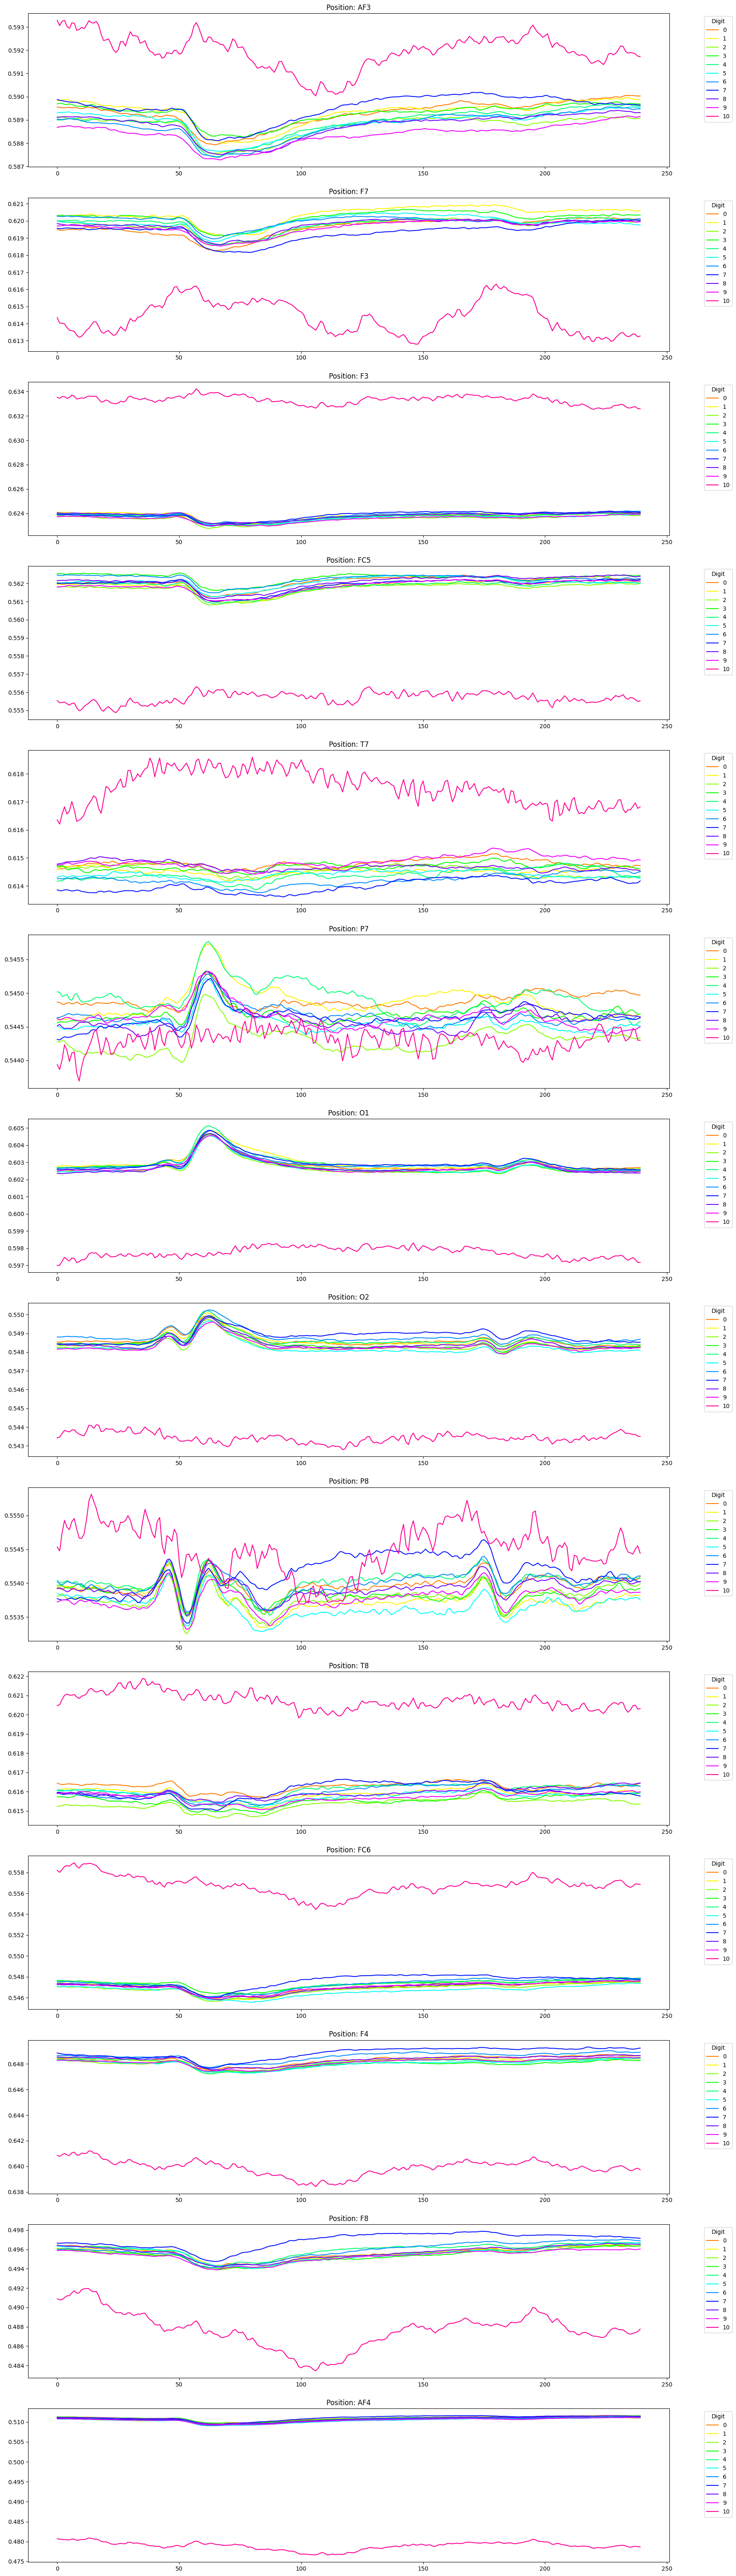

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_df is your DataFrame

# Group by position and digit, then calculate the mean of data series
grouped_data = data_df.groupby(['pos', 'digit']).apply(lambda x: pd.DataFrame(x['data'].tolist()).mean().tolist())

n_subplots = len(data_df['pos'].unique())
fig, axes = plt.subplots(nrows=n_subplots, ncols=1, figsize=(20, 80))

# Create a color palette with 11 distinct colors
palette = sns.color_palette("hsv", 11)

for i, pos in enumerate(data_df['pos'].unique()):
    pos_group = grouped_data.xs(pos)
    for digit, data_series in pos_group.iteritems():
        sns.lineplot(x=range(len(data_series)), y=data_series, ax=axes[i], color=palette[int(digit)], label=int(digit))

    axes[i].set_title(f'Position: {pos}')
    axes[i].legend(title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [ ]:
pos_values = data_df['pos'].unique()
print(pos_values)
data_lengths = data_df['data'].apply(len)
unique_lengths = data_lengths.unique()
print(unique_lengths)
del data_lengths

['AF3' 'F7' 'F3' 'FC5' 'T7' 'P7' 'O1' 'O2' 'P8' 'T8' 'FC6' 'F4' 'F8' 'AF4']
[240]


In [ ]:
coordinates = {
    'AF3': {'phi': (129.9+89.7)/2,
            'theta': (52.2+41.0)/2},
    'F7': {'phi': 137.2,
            'theta': 83.1},
    'F3': {'phi': 129.9,
            'theta': 52.2},
    'FC5': {'phi': (137.2+129.9+173.9+180)/4 ,
            'theta': (83.1+52.2+95+45.2/4)},
    'T7': {'phi': 173.9,
            'theta': 95.0},
    'P7': {'phi': 216.1,
            'theta': 92.9},
    'O1': {'phi': 250.6,
            'theta': 89.2},
    'O2': {'phi': 287.5,
            'theta': 90.1},
    'P8': {'phi': 322.7,
            'theta': 94.9},
    'T8': {'phi': 3.2,
            'theta': 95.8},
    'FC6': {'phi': (-1.0+3.2+40.3+49.8)/4,
            'theta':(46.0+95.8+84.1+53.6)/4 },
    'F4': {'phi': 49.8,
            'theta': 53.6},
    'F8': {'phi': 40.3,
            'theta': 84.1},
    'AF4': {'phi': (89.7+49.8)/2,
            'theta': (41.0+53.6)/2}
}

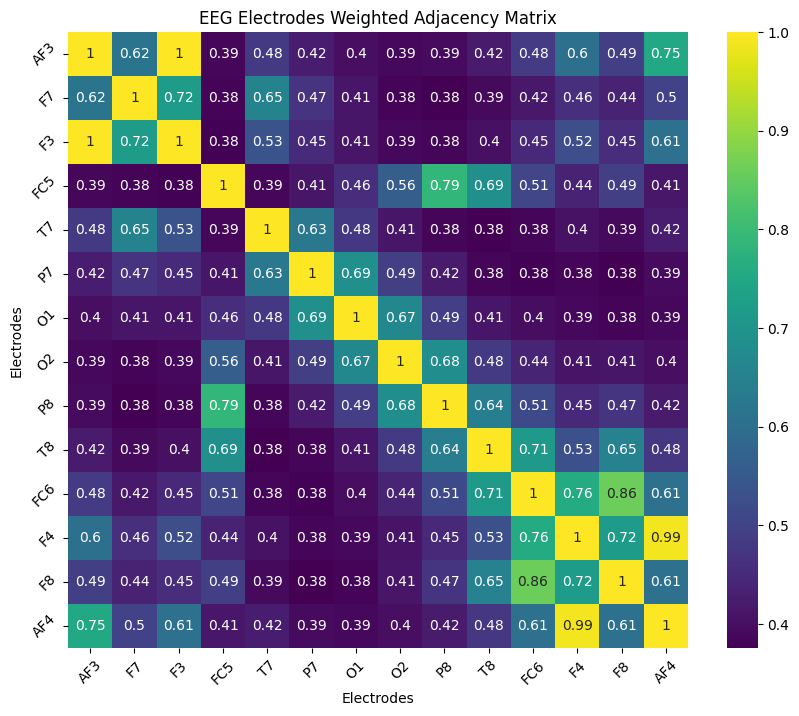

In [ ]:
def spherical_to_cartesian(phi, theta):
    phi_rad = np.radians(phi)
    theta_rad = np.radians(theta)
    x = np.cos(phi_rad) * np.sin(theta_rad)
    y = np.sin(phi_rad) * np.sin(theta_rad)
    z = np.cos(theta_rad)
    return x, y, z

adjacency_matrix = np.zeros((len(coordinates), len(coordinates)))

for i, (coord_i, values_i) in enumerate(coordinates.items()):
    x_i, y_i, z_i = spherical_to_cartesian(values_i['phi'], values_i['theta'])
    for j, (coord_j, values_j) in enumerate(coordinates.items()):
        if i != j:
            x_j, y_j, z_j = spherical_to_cartesian(values_j['phi'], values_j['theta'])
            d = np.sqrt((x_j - x_i) ** 2 + (y_j - y_i) ** 2 + (z_j - z_i) ** 2)
            w = 1 / np.sqrt(d)
            adjacency_matrix[i, j] = w

max_weight = adjacency_matrix.max()
adjacency_matrix[adjacency_matrix > 0] /= max_weight

np.fill_diagonal(adjacency_matrix, 1)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(adjacency_matrix, annot=True, cmap='viridis', ax=ax)

plt.title('EEG Electrodes Weighted Adjacency Matrix')
plt.xlabel('Electrodes')
plt.ylabel('Electrodes')
plt.xticks(ticks=np.arange(len(coordinates)) + 0.5, labels=list(coordinates.keys()), rotation=45)
plt.yticks(ticks=np.arange(len(coordinates)) + 0.5, labels=list(coordinates.keys()), rotation=45)

plt.show()


In [ ]:
def calculate_weights(coordinates):

    num_nodes = len(coordinates)
    adjacency_matrix = np.zeros((num_nodes, num_nodes))

    for i, coord_i in enumerate(coordinates.keys()):
        values_i = coordinates[coord_i]
        x_i, y_i, z_i = spherical_to_cartesian(values_i['phi'], values_i['theta'])
        for j, coord_j in enumerate(coordinates.keys()):
            if i != j:
                values_j = coordinates[coord_j]
                x_j, y_j, z_j = spherical_to_cartesian(values_j['phi'], values_j['theta'])
                d = np.sqrt((x_j - x_i) ** 2 + (y_j - y_i) ** 2 + (z_j - z_i) ** 2)
                w = 1 / d
                adjacency_matrix[i, j] = w

    max_weight = adjacency_matrix.max()
    adjacency_matrix[adjacency_matrix > 0] /= max_weight
    np.fill_diagonal(adjacency_matrix, 1)

    return adjacency_matrix



In [ ]:
class EEGGraphDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, edge_index, edge_weight):
        self.dataframe = dataframe
        self.edge_index = edge_index
        self.edge_weight = edge_weight
        self.edge_index = to_undirected(self.edge_index)
        self.edge_index, _ = add_self_loops(self.edge_index)
        self.unique_events = dataframe['event'].unique()

    def __len__(self):
        return len(self.unique_events)

    def __getitem__(self, idx):
        event_id = self.unique_events[idx]
        event_data = self.dataframe[self.dataframe['event'] == event_id]
        x = torch.tensor([row.data for row in event_data.itertuples(index=False)], dtype=torch.float)
        x = x.view(14, -1)
        label = event_data.iloc[0]['digit']
        return Data(x=x, edge_index=self.edge_index, edge_attr=self.edge_weight, label=label)


In [ ]:
for name, size in sorted(((name, sys.getsizeof(value)) for name, value in globals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, size))


                       data_df: 1932992618
                  grouped_data:   304976
                     pos_group:    21752
                          line:     3149
                          tqdm:     2016
                   data_series:     1976
              adjacency_matrix:     1696
                          _iii:     1364
                          _i14:     1364
                           _i2:     1205


In [ ]:
from torch.utils.data import Subset

def custom_train_test_split(dataset, test_size=0.2, random_state=42):
    np.random.seed(random_state)

    indices = np.arange(len(dataset))
    print(indices.size)
    np.random.shuffle(indices)

    split_idx = int(len(dataset) * (1 - test_size))
    print(split_idx)

    train_indices, test_indices = indices[:split_idx], indices[split_idx:]

    print('split done')

    train_dataset = Subset(dataset, train_indices)
    print(train_dataset)
    test_dataset = Subset(dataset, test_indices)
    print(test_dataset)

    return train_dataset, test_dataset

In [ ]:
G = nx.complete_graph(14)
edge_index = from_networkx(G).edge_index

weights = calculate_weights(coordinates)
edge_weights = torch.tensor(weights, dtype=torch.float)

eeg_dataset = EEGGraphDataset(data_df, edge_index, edge_weights)
print(eeg_dataset[0])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in globals().items()),
                        key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, size))

train_dataset, test_dataset = train_test_split(eeg_dataset, test_size=0.2, random_state=42)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

del data_df

Data(x=[14, 240], edge_index=[2, 196], edge_attr=[14, 14], label=6.0)
cuda


<ipython-input-16-4b850fdb4cbb>:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  x = torch.tensor([row.data for row in event_data.itertuples(index=False)], dtype=torch.float)


                       data_df: 1932992618
                  grouped_data:   304976
                     pos_group:    21752
                          line:     3149
                          tqdm:     2016
                   data_series:     1976
              adjacency_matrix:     1696
                       weights:     1696
                          _i14:     1364
                           _i2:     1205


In [ ]:
class GCNClassifier(Module):
    def __init__(self, in_channels, dropout=0.5):
        super(GCNClassifier, self).__init__()

        self.dropout = dropout

        self.conv1 = GCNConv(in_channels, 256)
        self.conv2 = GCNConv(256, 512)
        self.conv3 = GCNConv(512, 256)
        self.conv4 = GCNConv(256, 128)
        self.conv5 = GCNConv(128, 64)
        self.conv6 = GCNConv(64, 32)
        self.conv7 = GCNConv(32, 16)

        self.bn1 = BatchNorm1d(256)
        self.bn2 = BatchNorm1d(512)
        self.bn3 = BatchNorm1d(256)
        self.bn4 = BatchNorm1d(128)
        self.bn5 = BatchNorm1d(64)
        self.bn6 = BatchNorm1d(32)
        self.bn7 = BatchNorm1d(16)

        self.linear = Linear(16, 11)

    def forward(self, x, edge_index, edge_weight, batch):
        x = self.conv1(x, edge_index, edge_weight)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv2(x, edge_index, edge_weight)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv3(x, edge_index, edge_weight)
        x = self.bn3(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv4(x, edge_index, edge_weight)
        x = self.bn4(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv5(x, edge_index, edge_weight)
        x = self.bn5(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv6(x, edge_index, edge_weight)
        x = self.bn6(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv7(x, edge_index, edge_weight)
        x = self.bn7(x)

        x = global_mean_pool(x, batch)
        output = self.linear(x)

        return output

In [ ]:
from torch_geometric.nn import GATConv

class GATClassifier(torch.nn.Module):
    def __init__(self, in_channels, dropout=0.5):
        super(GATClassifier, self).__init__()
        self.dropout = dropout

        self.conv1 = GATConv(in_channels, 32, heads=8, dropout=dropout)
        self.conv2 = GATConv(256, 64, heads=8, dropout=dropout)
        self.conv3 = GATConv(512, 32, heads=8, dropout=dropout)
        self.conv4 = GATConv(256, 16, heads=8, dropout=dropout)
        self.conv5 = GATConv(128, 8, heads=8, dropout=dropout)
        self.conv6 = GATConv(64, 4, heads=8, dropout=dropout)
        self.conv7 = GATConv(32, 2, heads=8, dropout=dropout)

        self.bn1 = BatchNorm1d(256)
        self.bn2 = BatchNorm1d(512)
        self.bn3 = BatchNorm1d(256)
        self.bn4 = BatchNorm1d(128)
        self.bn5 = BatchNorm1d(64)
        self.bn6 = BatchNorm1d(32)
        self.bn7 = BatchNorm1d(16)

        self.linear = Linear(16, 11)

    def forward(self, x, edge_index, edge_weight, batch):
        x = self.conv1(x, edge_index, edge_weight)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv2(x, edge_index, edge_weight)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv3(x, edge_index, edge_weight)
        x = self.bn3(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv4(x, edge_index, edge_weight)
        x = self.bn4(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv5(x, edge_index, edge_weight)
        x = self.bn5(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv6(x, edge_index, edge_weight)
        x = self.bn6(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv7(x, edge_index, edge_weight)
        x = self.bn7(x)

        x = global_mean_pool(x, batch)
        output = self.linear(x)

        return output



In [ ]:
from torch_geometric.nn import SAGEConv

class SAGEClassifier(torch.nn.Module):
    def __init__(self, in_channels, dropout=0.5):
        super(SAGEClassifier, self).__init__()
        self.dropout = dropout

        self.conv1 = SAGEConv(in_channels, 256)
        self.conv2 = SAGEConv(256, 512)
        self.conv3 = SAGEConv(512, 256)
        self.conv4 = SAGEConv(256, 128)
        self.conv5 = SAGEConv(128, 64)
        self.conv6 = SAGEConv(64, 32)
        self.conv7 = SAGEConv(32, 16)

        self.bn1 = BatchNorm1d(256)
        self.bn2 = BatchNorm1d(512)
        self.bn3 = BatchNorm1d(256)
        self.bn4 = BatchNorm1d(128)
        self.bn5 = BatchNorm1d(64)
        self.bn6 = BatchNorm1d(32)
        self.bn7 = BatchNorm1d(16)

        self.linear = Linear(16, 11)

    def forward(self, x, edge_index, edge_weight, batch):
        x = self.conv1(x, edge_index, edge_weight)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv2(x, edge_index, edge_weight)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv3(x, edge_index, edge_weight)
        x = self.bn3(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv4(x, edge_index, edge_weight)
        x = self.bn4(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv5(x, edge_index, edge_weight)
        x = self.bn5(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv6(x, edge_index, edge_weight)
        x = self.bn6(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv7(x, edge_index, edge_weight)
        x = self.bn7(x)

        x = global_mean_pool(x, batch)
        output = self.linear(x)

        return output



In [ ]:
from torch_geometric.nn import ChebConv

class CHEBClassifier(torch.nn.Module):
    def __init__(self, in_channels, dropout=0.5):
        super(CHEBClassifier, self).__init__()
        self.dropout = dropout

        self.conv1 = ChebConv(in_channels, 256, K=2)
        self.conv2 = ChebConv(256, 512, K=2)
        self.conv3 = ChebConv(512, 256, K=2)
        self.conv4 = ChebConv(256, 128, K=2)
        self.conv5 = ChebConv(128, 64, K=2)
        self.conv6 = ChebConv(64, 32, K=2)
        self.conv7 = ChebConv(32, 16, K=2)

        self.bn1 = BatchNorm1d(256)
        self.bn2 = BatchNorm1d(512)
        self.bn3 = BatchNorm1d(256)
        self.bn4 = BatchNorm1d(128)
        self.bn5 = BatchNorm1d(64)
        self.bn6 = BatchNorm1d(32)
        self.bn7 = BatchNorm1d(16)

        self.linear = Linear(16, 11)

    def forward(self, x, edge_index, edge_weight, batch):
        x = self.conv1(x, edge_index, edge_weight)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv2(x, edge_index, edge_weight)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv3(x, edge_index, edge_weight)
        x = self.bn3(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv4(x, edge_index, edge_weight)
        x = self.bn4(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv5(x, edge_index, edge_weight)
        x = self.bn5(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv6(x, edge_index, edge_weight)
        x = self.bn6(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)

        x = self.conv7(x, edge_index, edge_weight)
        x = self.bn7(x)

        x = global_mean_pool(x, batch)
        output = self.linear(x)

        return output



cuda


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Loss: 2.327703586803591, Train Accuracy: 0.09828723015705196
Train Confusion Matrix:
 [[524 161 613 861 427 665 413 439 613 504   1]
 [519 132 551 817 424 669 434 438 578 498   0]
 [540 156 557 848 420 669 392 412 664 508   0]
 [555 133 660 850 420 661 443 450 622 544   0]
 [562 149 605 825 401 666 386 429 591 470   1]
 [556 159 583 816 450 683 440 430 603 544   0]
 [511 165 580 853 379 705 430 429 678 479   0]
 [505 154 614 814 393 648 395 425 616 499   0]
 [525 159 627 854 407 660 414 442 617 516   1]
 [536 157 592 899 395 678 432 428 644 494   0]
 [ 14   7  17  17  12  19  12  14  16  10   0]]


  2%|▏         | 1/50 [00:16<13:29, 16.53s/it]

Test Loss: 2.315837976680634, Test Accuracy: 0.10087651852990927
Epoch 2/50, Loss: 2.316624668984689, Train Accuracy: 0.10324676572922474
Train Confusion Matrix:
 [[ 300  477  541 1024  186  732  410    8  679  864    0]
 [ 298  469  534  988  161  712  389    9  690  810    0]
 [ 326  452  537  957  176  732  389    8  735  854    0]
 [ 308  458  537 1081  179  731  448   10  695  891    0]
 [ 288  422  525 1014  162  729  378   10  688  869    0]
 [ 314  436  544 1010  169  768  389    7  742  885    0]
 [ 308  441  545 1028  176  692  414   13  737  855    0]
 [ 296  440  533  959  198  691  386    8  701  850    1]
 [ 308  439  548 1020  171  702  406   11  752  865    0]
 [ 296  446  558  979  173  728  401    6  788  880    0]
 [  15   20   12   24    2   15   15    1   18   16    0]]


  4%|▍         | 2/50 [00:33<13:17, 16.62s/it]

Test Loss: 2.3152218327768312, Test Accuracy: 0.1005689681685376
Epoch 3/50, Loss: 2.3160294046554473, Train Accuracy: 0.09886392033986274
Train Confusion Matrix:
 [[ 530   89  328 1131  362  864  455  286  531  645    0]
 [ 512   99  314 1089  363  840  400  262  519  662    0]
 [ 569  106  293 1168  360  851  403  228  506  682    0]
 [ 526  119  331 1195  384  840  398  285  530  728    2]
 [ 544  105  276 1108  348  830  418  245  508  703    0]
 [ 553  114  338 1123  386  867  419  251  515  698    0]
 [ 531  107  296 1156  381  875  391  283  545  642    2]
 [ 546   96  307 1133  343  863  396  253  491  635    0]
 [ 540  105  337 1179  358  859  384  277  499  683    1]
 [ 535  112  328 1119  364  920  405  263  539  668    2]
 [  12    4    3   37    8   28    6    5   15   20    0]]


  6%|▌         | 3/50 [00:49<12:56, 16.51s/it]

Test Loss: 2.3131291262933606, Test Accuracy: 0.10110718130093803
Epoch 4/50, Loss: 2.316369508318649, Train Accuracy: 0.1022471694123527
Train Confusion Matrix:
 [[ 695   72  455 1207   58  772  346  574  412  630    0]
 [ 646   49  398 1178   56  790  343  587  384  629    0]
 [ 658   71  406 1186   43  809  366  619  381  627    0]
 [ 663   73  430 1237   59  856  342  571  420  687    0]
 [ 649   63  443 1161   43  743  367  541  414  660    1]
 [ 658   75  400 1191   56  845  339  581  420  698    1]
 [ 695   81  412 1200   55  792  346  581  401  646    0]
 [ 668   58  396 1184   51  716  359  622  414  595    0]
 [ 638   86  429 1193   59  828  368  590  366  665    0]
 [ 696   74  432 1194   44  773  335  573  424  710    0]
 [  15    0   11   35    1   32    8   11    9   16    0]]


  8%|▊         | 4/50 [01:05<12:35, 16.43s/it]

Test Loss: 2.3115209490426927, Test Accuracy: 0.10126095648162386
Epoch 5/50, Loss: 2.3156684005099177, Train Accuracy: 0.10320831971703735
Train Confusion Matrix:
 [[ 809   53  405 1015  193  956  275  471  630  414    0]
 [ 770   35  408 1034  135  978  241  424  629  406    0]
 [ 745   51  467  990  155 1030  274  441  611  402    0]
 [ 806   64  419 1069  159 1003  269  447  668  434    0]
 [ 790   55  403 1021  157  955  253  378  629  444    0]
 [ 768   55  427 1053  160 1010  269  448  636  438    0]
 [ 735   65  466 1038  155  993  247  455  631  424    0]
 [ 752   52  398 1040  159  909  258  428  646  419    2]
 [ 778   54  413 1056  165  993  243  404  683  432    1]
 [ 781   43  450 1064  136  963  300  445  609  464    0]
 [  16    2    9   34    4   31   11    6   16    9    0]]


 10%|█         | 5/50 [01:22<12:20, 16.46s/it]

Test Loss: 2.312159824722815, Test Accuracy: 0.10003075503613716
Epoch 6/50, Loss: 2.3157354735507005, Train Accuracy: 0.10172814824782299
Train Confusion Matrix:
 [[ 390  355  346 1026  112  879  639  428  495  551    0]
 [ 385  358  329 1032   94  837  617  413  476  519    0]
 [ 367  394  349 1000  102  903  614  430  485  522    0]
 [ 389  344  359 1122   97  905  672  454  452  544    0]
 [ 388  367  340 1029  108  859  583  429  456  526    0]
 [ 387  369  363 1073  132  875  622  398  509  536    0]
 [ 380  384  359 1057   97  841  642  443  442  564    0]
 [ 406  336  315  986  102  794  676  453  432  563    0]
 [ 402  371  349 1054  110  852  651  427  485  521    0]
 [ 385  397  353  997  107  934  649  424  499  510    0]
 [   7   15    3   30    5   25   22    6    9   16    0]]


 12%|█▏        | 6/50 [01:38<12:02, 16.42s/it]

Test Loss: 2.313984841620893, Test Accuracy: 0.0976472397355067
Epoch 7/50, Loss: 2.31580577330689, Train Accuracy: 0.10240095346110224
Train Confusion Matrix:
 [[ 617  158  389 1433  126  800  397  611  183  507    0]
 [ 590  174  420 1339  129  747  387  605  195  474    0]
 [ 609  186  428 1352  110  770  390  643  182  496    0]
 [ 597  190  441 1531  129  750  410  631  202  457    0]
 [ 587  161  398 1377  125  764  393  639  175  466    0]
 [ 586  162  455 1390  129  758  443  641  190  509    1]
 [ 596  151  423 1401  128  772  389  675  154  520    0]
 [ 603  162  412 1377  118  705  401  662  178  445    0]
 [ 580  163  406 1423  140  801  409  665  168  467    0]
 [ 624  167  440 1416  136  762  405  641  189  475    0]
 [   9    6   12   47    0   25    9   10    6   14    0]]


 14%|█▍        | 7/50 [01:55<11:46, 16.43s/it]

Test Loss: 2.3121922754245543, Test Accuracy: 0.09534061202521912
Epoch 8/50, Loss: 2.3158530147899707, Train Accuracy: 0.10130524211376175
Train Confusion Matrix:
 [[ 305   98  349  837  297  939  754  561  630  450    1]
 [ 290   81  323  779  297  951  702  584  646  407    0]
 [ 329  108  342  764  280  970  720  580  655  418    0]
 [ 295   93  331  809  324 1025  750  591  679  441    0]
 [ 277   93  325  785  302  980  667  564  618  474    0]
 [ 317   99  320  793  327 1028  774  542  598  466    0]
 [ 337   91  317  809  308  999  731  591  632  394    0]
 [ 344   91  317  746  282  912  721  606  634  410    0]
 [ 340   76  321  807  308 1041  691  556  654  428    0]
 [ 337   84  329  849  330  966  739  580  629  412    0]
 [   7    2    9   31    9   33   13   11   17    6    0]]


 16%|█▌        | 8/50 [02:12<11:36, 16.57s/it]

Test Loss: 2.3124479814009233, Test Accuracy: 0.0977241273258496
Epoch 9/50, Loss: 2.3159798704830044, Train Accuracy: 0.09826800715095826
Train Confusion Matrix:
 [[ 511  130  555 1094   82  418  295  659  687  790    0]
 [ 535  148  543 1061   67  394  291  595  675  751    0]
 [ 538  166  561 1055   76  421  285  652  653  759    0]
 [ 533  142  611 1026   84  427  304  625  720  866    0]
 [ 524  139  505 1074   71  380  311  622  637  822    0]
 [ 527  147  584 1065   76  385  324  606  674  876    0]
 [ 498  159  591 1058   76  391  285  688  666  796    1]
 [ 496  155  551 1014   87  402  287  673  650  748    0]
 [ 501  138  611 1123   72  412  285  612  683  785    0]
 [ 562  150  582 1041   70  441  310  639  691  769    0]
 [  17    6   12   39    2   10    4    8   14   26    0]]


 18%|█▊        | 9/50 [02:29<11:24, 16.70s/it]

Test Loss: 2.318569155231448, Test Accuracy: 0.10041519298785176
Epoch 10/50, Loss: 2.315388075393358, Train Accuracy: 0.10126679610157437
Train Confusion Matrix:
 [[ 189  184  293  791  185  582  630 1200  243  924    0]
 [ 191  193  285  825  185  605  580 1117  249  830    0]
 [ 236  188  284  765  179  616  621 1169  241  867    0]
 [ 233  207  299  832  177  642  643 1089  283  933    0]
 [ 241  169  265  781  163  613  610 1144  242  857    0]
 [ 208  199  315  857  183  563  616 1171  286  866    0]
 [ 212  195  314  766  183  585  642 1173  258  881    0]
 [ 199  182  269  728  165  541  618 1281  268  812    0]
 [ 211  206  275  811  174  594  641 1209  252  849    0]
 [ 214  219  271  768  158  626  629 1228  273  869    0]
 [   8    6   12   26    3   19   15   13    7   29    0]]


 20%|██        | 10/50 [02:46<11:11, 16.79s/it]

Test Loss: 2.313305566000411, Test Accuracy: 0.10095340612025219
Epoch 11/50, Loss: 2.3161347633798184, Train Accuracy: 0.10047865285173295
Train Confusion Matrix:
 [[ 622  135  307 1233   78  552  479  698  500  617    0]
 [ 581  119  304 1178   84  562  496  668  504  564    0]
 [ 647  129  318 1184   98  511  482  732  490  575    0]
 [ 599  112  312 1305   90  582  518  675  550  595    0]
 [ 607  130  321 1181   71  508  486  730  499  552    0]
 [ 607  149  330 1273   99  546  510  655  505  590    0]
 [ 611  134  313 1244   88  510  486  708  531  584    0]
 [ 590  141  304 1109   83  484  545  723  496  588    0]
 [ 626  121  311 1265   84  531  515  680  474  615    0]
 [ 604  122  321 1256   85  571  480  702  551  563    0]
 [  11    3   10   39    4   24   11   11   15   10    0]]


 22%|██▏       | 11/50 [03:03<10:57, 16.85s/it]

Test Loss: 2.3113602894822853, Test Accuracy: 0.09887744118099338
Epoch 12/50, Loss: 2.315395886900973, Train Accuracy: 0.10426558505219047
Train Confusion Matrix:
 [[ 330  149  330  981  430  811  327 1059  589  215    0]
 [ 337  142  284  981  387  840  277 1028  562  222    0]
 [ 373  171  335  929  401  814  291 1046  598  208    0]
 [ 349  156  335 1058  437  873  279 1021  578  252    0]
 [ 353  155  325  966  448  776  307 1011  536  208    0]
 [ 324  168  307 1034  404  870  346 1039  561  211    0]
 [ 318  132  353 1011  418  801  306 1062  582  226    0]
 [ 337  140  337  883  446  675  321 1153  574  197    0]
 [ 316  203  307 1018  457  849  310  991  561  210    0]
 [ 342  162  324 1018  469  812  297 1044  566  221    0]
 [   3    4    9   34    3   30    5   22   24    4    0]]


 24%|██▍       | 12/50 [03:19<10:39, 16.84s/it]

Test Loss: 2.3151010875326996, Test Accuracy: 0.0977241273258496
Epoch 13/50, Loss: 2.315112220111955, Train Accuracy: 0.10403490897906614
Train Confusion Matrix:
 [[ 175  347  208  843  255  729  467 1088  621  488    0]
 [ 198  349  181  821  258  645  499 1072  568  469    0]
 [ 188  356  203  789  240  748  470 1115  586  471    0]
 [ 193  397  199  860  256  729  517 1111  604  472    0]
 [ 186  326  193  821  225  705  432 1098  603  496    0]
 [ 196  364  216  879  255  716  437 1066  616  519    0]
 [ 198  331  171  827  231  778  479 1124  608  462    0]
 [ 189  297  214  743  229  626  466 1311  549  439    0]
 [ 204  362  220  868  245  748  437 1054  602  482    0]
 [ 198  342  207  848  244  741  457 1096  630  492    0]
 [   6   13    2   34    6   17   11   22   22    5    0]]


 26%|██▌       | 13/50 [03:36<10:22, 16.84s/it]

Test Loss: 2.315948399044665, Test Accuracy: 0.0972628017837921
Epoch 14/50, Loss: 2.3150058678302083, Train Accuracy: 0.10653389977124622
Train Confusion Matrix:
 [[ 280   59  162 1038   96  842  421 1147  602  574    0]
 [ 312   58  141 1000   85  801  405 1129  587  542    0]
 [ 281   51  153 1029   78  856  421 1151  599  546    1]
 [ 309   74  189 1065   83  833  411 1172  629  572    1]
 [ 278   54  195 1011   90  763  416 1130  574  572    2]
 [ 313   51  179 1096   82  864  408 1066  662  543    0]
 [ 296   53  167  982   86  855  430 1158  625  557    0]
 [ 266   67  155  950   70  698  412 1365  569  511    0]
 [ 306   66  155  992   77  810  434 1148  686  548    0]
 [ 288   60  171 1053   78  800  429 1182  643  551    0]
 [  10    1    3   20    7   36    8   30   12   11    0]]


 28%|██▊       | 14/50 [03:54<10:12, 17.02s/it]

Test Loss: 2.3185496248249926, Test Accuracy: 0.09787790250653544
Epoch 15/50, Loss: 2.314942423267998, Train Accuracy: 0.10655312277733991
Train Confusion Matrix:
 [[ 296   86  416  841  247 1023  226 1190  345  551    0]
 [ 316   79  386  833  240 1000  225 1154  335  492    0]
 [ 293   81  422  898  232  948  232 1256  289  515    0]
 [ 332  105  428  849  238 1076  249 1134  374  553    0]
 [ 291   76  372  826  232 1001  220 1240  303  524    0]
 [ 283  102  382  933  246 1117  201 1119  359  522    0]
 [ 290   81  412  835  240 1014  229 1233  352  523    0]
 [ 268   78  428  773  241  851  209 1431  287  497    0]
 [ 287   89  424  868  245 1024  205 1210  366  504    0]
 [ 333   85  412  892  241  985  205 1243  337  522    0]
 [   5    4    8   21    8   30   14   30    6   12    0]]


 30%|███       | 15/50 [04:10<09:53, 16.95s/it]

Test Loss: 2.3109407038302034, Test Accuracy: 0.10795017684145779
Epoch 16/50, Loss: 2.314576273328117, Train Accuracy: 0.10734126602718133
Train Confusion Matrix:
 [[ 246  335  120  804  140  863  442 1309  474  487    1]
 [ 240  371  127  832  114  899  376 1222  454  425    0]
 [ 265  342  118  781  137  895  442 1312  460  413    1]
 [ 223  357  146  863  150  908  467 1270  484  470    0]
 [ 227  347  114  846  128  805  428 1272  482  435    1]
 [ 231  393  123  875  150  910  437 1215  474  455    1]
 [ 241  325  131  821  147  841  451 1328  462  462    0]
 [ 219  331  122  745  153  714  429 1524  416  410    0]
 [ 244  390  124  857  102  867  434 1277  476  451    0]
 [ 275  354  134  788  122  871  436 1327  451  497    0]
 [   5   10    2   21    2   20   11   34   16   17    0]]


 32%|███▏      | 16/50 [04:27<09:36, 16.95s/it]

Test Loss: 2.3140115298568764, Test Accuracy: 0.1014147316623097
Epoch 17/50, Loss: 2.3147468044895674, Train Accuracy: 0.10630322369812191
Train Confusion Matrix:
 [[ 349  199  291  926  156  704  285 1125  658  528    0]
 [ 318  180  246  927  157  710  289 1032  663  538    0]
 [ 319  199  298  810  179  683  275 1206  643  554    0]
 [ 355  174  274  921  169  784  310 1092  681  578    0]
 [ 330  157  286  844  162  729  269 1120  637  551    0]
 [ 347  186  324  924  160  710  284 1070  727  532    0]
 [ 339  211  278  887  153  647  296 1175  669  554    0]
 [ 317  181  282  761  173  606  304 1344  593  502    0]
 [ 308  195  297  878  166  705  310 1131  701  531    0]
 [ 314  201  294  885  168  721  268 1174  661  569    0]
 [   5    7    6   22    4   22    8   32   24    8    0]]


 34%|███▍      | 17/50 [04:44<09:20, 16.98s/it]

Test Loss: 2.3115593022152012, Test Accuracy: 0.10149161925265263
Epoch 18/50, Loss: 2.3144139316835672, Train Accuracy: 0.10803329424655428
Train Confusion Matrix:
 [[ 316  167  351  922   67 1109  460 1309  203  317    0]
 [ 300  149  319  889   74 1102  478 1265  181  302    1]
 [ 314  140  348  878   62 1079  404 1358  233  350    0]
 [ 311  170  343  941   61 1154  509 1279  233  337    0]
 [ 330  140  326  863   52 1049  484 1319  206  316    0]
 [ 304  164  336  928   59 1199  458 1227  253  336    0]
 [ 336  183  320  900   55 1057  450 1394  206  308    0]
 [ 289  118  347  792   63  929  491 1598  137  299    0]
 [ 334  141  350  919   68 1156  467 1215  234  338    0]
 [ 372  145  328  960   64 1091  437 1308  215  333    2]
 [   5    7    4   29    1   35    6   35    8    8    0]]


 36%|███▌      | 18/50 [05:01<09:03, 16.99s/it]

Test Loss: 2.316237734342383, Test Accuracy: 0.09926187913270798
Epoch 19/50, Loss: 2.313911665556322, Train Accuracy: 0.10786028719171104
Train Confusion Matrix:
 [[ 376  415  225  390   78 1112  204 1469  362  590    0]
 [ 369  447  211  383   64 1105  216 1276  393  596    0]
 [ 363  461  203  393   73 1041  223 1465  355  589    0]
 [ 363  478  237  401   64 1171  227 1361  429  607    0]
 [ 399  436  220  389   52 1049  209 1387  376  568    0]
 [ 376  449  217  439   56 1162  235 1289  399  641    1]
 [ 364  420  195  373   63 1045  242 1456  406  645    0]
 [ 319  373  224  330   70  912  228 1738  338  530    1]
 [ 377  442  210  436   68 1121  243 1377  393  555    0]
 [ 410  448  224  391   58 1070  236 1407  411  597    3]
 [  13    7    8   15    2   30    9   34   14    6    0]]


 38%|███▊      | 19/50 [05:18<08:45, 16.96s/it]

Test Loss: 2.3125182844204164, Test Accuracy: 0.10149161925265263
Epoch 20/50, Loss: 2.3142725177943193, Train Accuracy: 0.10920589761826954
Train Confusion Matrix:
 [[ 222  109  180 1166   27  883  448 1493  380  313    0]
 [ 232  101  172 1117   16  873  460 1368  413  308    0]
 [ 244  100  167 1161   23  856  464 1470  372  309    0]
 [ 253  120  195 1228   16  894  495 1419  403  315    0]
 [ 234  113  170 1105   15  830  444 1448  407  319    0]
 [ 245  105  180 1183   24  922  455 1352  412  386    0]
 [ 221  116  179 1116   26  876  487 1483  393  312    0]
 [ 219   80  167 1014   16  678  455 1801  319  314    0]
 [ 219   96  191 1207   23  846  450 1424  411  355    0]
 [ 223  124  177 1141   16  888  485 1438  436  327    0]
 [   4    4    4   20    0   30    8   43   18    7    0]]


 40%|████      | 20/50 [05:36<08:30, 17.02s/it]

Test Loss: 2.3112581725202554, Test Accuracy: 0.10272182069813932
Epoch 21/50, Loss: 2.314077717205109, Train Accuracy: 0.10826397031967859
Train Confusion Matrix:
 [[ 246   97  360 1029   43 1196  139 1398  339  374    0]
 [ 259  121  306 1059   43 1155  138 1329  294  356    0]
 [ 263  101  345  982   58 1119  142 1479  325  352    0]
 [ 211  115  338 1071   69 1282  165 1354  339  394    0]
 [ 246  122  343  971   58 1119  131 1453  312  330    0]
 [ 271  119  343 1089   62 1270  149 1288  320  353    0]
 [ 247  126  364 1013   55 1120  149 1476  328  331    0]
 [ 249  100  368  865   52  972  144 1720  271  322    0]
 [ 249   99  375 1044   66 1211  149 1406  300  323    0]
 [ 292  141  351 1011   61 1198  139 1397  313  352    0]
 [   4    6   10   22    2   37    7   37    8    5    0]]


 42%|████▏     | 21/50 [05:52<08:13, 17.00s/it]

Test Loss: 2.311432747641711, Test Accuracy: 0.10610487467322774
Epoch 22/50, Loss: 2.3138913331143236, Train Accuracy: 0.10912900559389477
Train Confusion Matrix:
 [[ 122  104  270 1173  150  809  375 1280  498  439    1]
 [ 159   91  239 1104  151  823  333 1234  471  454    1]
 [ 139   97  248 1086  163  865  359 1367  405  436    1]
 [ 167   95  253 1213  196  876  348 1235  483  472    0]
 [ 152  107  270 1071  152  750  356 1326  443  458    0]
 [ 138  106  247 1216  152  902  357 1192  481  473    0]
 [ 138  101  261 1120  138  833  366 1371  428  453    0]
 [ 114   76  241  978  152  690  358 1645  420  389    0]
 [ 156  103  262 1182  159  856  353 1246  473  430    2]
 [ 138  105  262 1183  147  890  360 1274  431  465    0]
 [   5    2   12   23    6   25   10   25   19   11    0]]


 44%|████▍     | 22/50 [06:09<07:51, 16.86s/it]

Test Loss: 2.3269855015400878, Test Accuracy: 0.09956942949407965
Epoch 23/50, Loss: 2.313707522653859, Train Accuracy: 0.1095903577401434
Train Confusion Matrix:
 [[ 276  155   65 1368  141  634  600 1456  351  174    1]
 [ 264  155   55 1426  149  641  588 1264  358  160    0]
 [ 289  158   51 1356  130  617  596 1451  365  153    0]
 [ 301  171   61 1485  155  633  631 1332  385  183    1]
 [ 281  149   57 1306  150  624  601 1405  348  164    0]
 [ 302  164   54 1485  148  635  650 1294  369  163    0]
 [ 307  153   59 1316  151  630  663 1426  334  170    0]
 [ 271  136   55 1124  167  488  591 1749  299  183    0]
 [ 302  169   62 1401  142  613  611 1380  373  169    0]
 [ 293  151   61 1398  139  665  596 1411  376  164    1]
 [  11    2    2   34    5   16   15   39   11    3    0]]


 46%|████▌     | 23/50 [06:25<07:31, 16.73s/it]

Test Loss: 2.3141957483361923, Test Accuracy: 0.0984930032292788
Epoch 24/50, Loss: 2.3131149785838296, Train Accuracy: 0.11053228503873436
Train Confusion Matrix:
 [[ 393  229  221  815   66  749  258 1499  767  224    0]
 [ 346  221  226  805   77  794  292 1359  758  182    0]
 [ 372  216  252  813   75  734  264 1489  750  201    0]
 [ 377  265  269  836   82  834  287 1398  780  208    2]
 [ 372  224  219  810   56  739  266 1463  746  190    0]
 [ 393  241  252  838   66  829  267 1343  838  197    0]
 [ 397  230  218  768   62  779  306 1507  740  202    0]
 [ 357  190  184  640   76  648  306 1787  669  206    0]
 [ 407  207  228  746   63  837  281 1372  871  210    0]
 [ 389  225  235  834   74  764  310 1472  753  199    0]
 [  11    3    4   25    1   26    4   40   19    5    0]]


 48%|████▊     | 24/50 [06:42<07:12, 16.63s/it]

Test Loss: 2.311937181603996, Test Accuracy: 0.09864677840996464
Epoch 25/50, Loss: 2.3133260584991944, Train Accuracy: 0.10916745160608216
Train Confusion Matrix:
 [[ 333  180  135  724  223 1112  239 1393  638  244    0]
 [ 331  204  114  642  193 1174  247 1285  645  225    0]
 [ 325  160  108  712  196 1150  208 1512  569  226    0]
 [ 331  186  146  713  206 1214  233 1403  625  280    1]
 [ 291  176  111  665  217 1138  222 1398  629  238    0]
 [ 344  181  145  749  204 1252  212 1282  659  236    0]
 [ 322  175  123  652  211 1158  232 1494  605  236    1]
 [ 302  140  137  577  184  989  243 1761  516  213    1]
 [ 343  179  114  689  221 1174  227 1402  624  249    0]
 [ 346  167  127  704  184 1218  216 1418  639  235    1]
 [   2   10    4   27    3   30    3   41   16    2    0]]


 50%|█████     | 25/50 [06:58<06:54, 16.57s/it]

Test Loss: 2.3178213433492973, Test Accuracy: 0.09833922804859296
Epoch 26/50, Loss: 2.3141893704145744, Train Accuracy: 0.10699525191749486
Train Confusion Matrix:
 [[ 192  104  338 1024   73 1088  171 1448  425  357    1]
 [ 209   98  326  985   82 1027  205 1236  510  382    0]
 [ 190  108  338 1005   82 1015  197 1460  416  355    0]
 [ 223  134  332 1040   99 1133  211 1314  501  351    0]
 [ 200   85  304  976   79 1060  221 1385  447  327    1]
 [ 216  157  319 1082   99 1131  193 1277  445  345    0]
 [ 191  110  352 1015  110 1073  185 1403  413  357    0]
 [ 190   92  341  828   88  900  183 1721  409  311    0]
 [ 210  103  319 1075  100 1094  170 1357  432  361    1]
 [ 216  115  342 1005  102 1100  172 1391  462  350    0]
 [   6    3    7   24    4   26    3   37   20    8    0]]


 52%|█████▏    | 26/50 [07:15<06:37, 16.54s/it]

Test Loss: 2.3149453720823847, Test Accuracy: 0.10149161925265263
Epoch 27/50, Loss: 2.3134905816884057, Train Accuracy: 0.10826397031967859
Train Confusion Matrix:
 [[ 249  240   92  997   90  938  279 1607  483  246    0]
 [ 226  249  117  922   94 1038  305 1354  515  240    0]
 [ 273  246   98  883  108  949  284 1605  481  238    1]
 [ 222  249  114  961   98 1047  300 1509  563  274    1]
 [ 229  246  120  921   94  946  288 1542  461  238    0]
 [ 246  255  122  997  101 1046  291 1462  502  242    0]
 [ 250  216  119  955  105  975  260 1573  484  272    0]
 [ 264  193  139  751   81  800  284 1935  388  227    1]
 [ 253  249  116  970   98  981  309 1490  520  236    0]
 [ 276  254  132  950  115 1017  236 1560  494  220    1]
 [   3   10    3   24    0   29    1   42   20    6    0]]


 54%|█████▍    | 27/50 [07:31<06:19, 16.48s/it]

Test Loss: 2.314096904796816, Test Accuracy: 0.10033830539750885
Epoch 28/50, Loss: 2.3136215734892374, Train Accuracy: 0.10836008535014706
Train Confusion Matrix:
 [[ 272   51  167 1035  167  861  306 1428  595  339    0]
 [ 271   51  182 1038  129  891  257 1360  569  311    1]
 [ 282   47  174 1005  151  878  291 1494  521  323    0]
 [ 317   64  159 1090  168  953  331 1359  543  354    0]
 [ 306   47  165  974  145  887  275 1409  547  330    0]
 [ 294   57  162 1107  144  940  296 1341  594  329    0]
 [ 256   46  164 1003  160  901  295 1457  575  352    0]
 [ 281   38  200  840  163  748  270 1750  470  303    0]
 [ 295   41  181 1044  146  929  309 1362  587  328    0]
 [ 260   52  190 1048  162  882  319 1438  571  333    0]
 [   9    1    4   32    1   24   10   32   21    4    0]]


 56%|█████▌    | 28/50 [07:47<06:02, 16.46s/it]

Test Loss: 2.316146024029144, Test Accuracy: 0.10079963093956636
Epoch 29/50, Loss: 2.313414163108535, Train Accuracy: 0.10997481786201727
Train Confusion Matrix:
 [[ 382   83  296  971  191 1183  226 1436  329  123    1]
 [ 363   91  248  957  206 1234  224 1314  305  117    1]
 [ 363  125  292  968  193 1141  185 1461  323  115    0]
 [ 408  114  283 1049  184 1287  235 1360  308  110    0]
 [ 396  101  265  970  201 1115  211 1441  272  112    1]
 [ 395  127  287  966  207 1320  219 1300  321  122    0]
 [ 399   99  302 1032  198 1124  210 1431  302  112    0]
 [ 328  105  273  870  197  922  209 1774  286   98    1]
 [ 382  107  295 1019  176 1192  213 1418  309  108    3]
 [ 388  101  283 1013  203 1190  244 1426  314   93    0]
 [  15    2   11   17    4   36    6   32   13    2    0]]


 58%|█████▊    | 29/50 [08:04<05:44, 16.42s/it]

Test Loss: 2.3140210882744565, Test Accuracy: 0.09487928648316162
Epoch 30/50, Loss: 2.3133050720923354, Train Accuracy: 0.1090713365756137
Train Confusion Matrix:
 [[ 367  178  270 1125   97  925  113 1329  371  446    0]
 [ 338  167  275 1146   90 1015  115 1160  363  391    0]
 [ 330  155  274 1078  101  959  133 1382  318  434    2]
 [ 357  150  289 1199  100 1055   99 1240  417  431    1]
 [ 324  160  302 1150   88  941  123 1261  338  398    0]
 [ 332  157  268 1209   88 1084  133 1166  383  441    3]
 [ 331  152  300 1126  116  946   96 1344  364  433    1]
 [ 321  118  300  973  106  811  105 1632  303  394    0]
 [ 339  177  268 1206  108  981  119 1250  343  431    0]
 [ 364  168  263 1150  115  989  113 1305  364  423    1]
 [   6    2    6   22    4   31   11   36   11    8    1]]


 60%|██████    | 30/50 [08:20<05:29, 16.45s/it]

Test Loss: 2.3108080306275762, Test Accuracy: 0.10349069660156851
Epoch 31/50, Loss: 2.313015710237135, Train Accuracy: 0.11235847061763518
Train Confusion Matrix:
 [[ 371  187  184 1097  171  978  152 1419  442  220    0]
 [ 317  178  166 1172  146 1021  142 1285  393  238    2]
 [ 318  187  148 1090  163  980  134 1474  443  228    1]
 [ 347  202  151 1238  167 1048  166 1351  432  234    2]
 [ 324  192  152 1105  153 1005  124 1397  390  242    1]
 [ 323  212  168 1206  161 1094  136 1293  403  268    0]
 [ 359  149  182 1171  164  973  139 1449  411  211    1]
 [ 336  150  166  930  143  804  127 1832  393  182    0]
 [ 329  183  209 1140  153 1075  116 1371  443  203    0]
 [ 320  196  167 1168  169  983  144 1433  425  249    1]
 [   2    6    4   28    3   31    3   39   14    8    0]]


 62%|██████▏   | 31/50 [08:37<05:12, 16.45s/it]

Test Loss: 2.3386079854988644, Test Accuracy: 0.10087651852990927
Epoch 32/50, Loss: 2.313172494939919, Train Accuracy: 0.1077065031429615
Train Confusion Matrix:
 [[ 409  154  235 1121  181  871  279 1405  241  325    0]
 [ 426  150  233 1091  162  834  291 1251  278  344    0]
 [ 455  142  198 1072  159  769  287 1478  282  324    0]
 [ 448  176  192 1123  194  869  303 1349  301  382    1]
 [ 431  134  216 1037  184  796  320 1377  259  331    0]
 [ 437  173  244 1187  181  855  325 1234  273  355    0]
 [ 463  149  202 1010  148  864  314 1440  255  362    2]
 [ 435  114  217  892  147  667  293 1760  218  320    0]
 [ 430  152  228 1087  165  895  300 1391  265  309    0]
 [ 447  155  208 1114  155  809  301 1438  283  345    0]
 [  11    0    1   19    4   36   14   30   13   10    0]]


 64%|██████▍   | 32/50 [08:53<04:56, 16.47s/it]

Test Loss: 2.3144143957470793, Test Accuracy: 0.09956942949407965
Epoch 33/50, Loss: 2.312391302535748, Train Accuracy: 0.10939812767920648
Train Confusion Matrix:
 [[ 145  243  216 1058   79 1009  337 1518  233  383    0]
 [ 128  276  202 1040   72 1039  317 1393  252  340    1]
 [ 150  256  217 1007   73  977  361 1522  223  380    0]
 [ 158  282  203 1097   95 1119  335 1399  256  394    0]
 [ 135  244  211  953   76 1023  303 1503  231  405    1]
 [ 129  283  193 1153   87 1055  363 1340  231  430    0]
 [ 152  266  217 1057   75  975  335 1563  211  358    0]
 [ 138  207  193  922   69  786  330 1904  178  335    1]
 [ 141  260  209 1056   78 1001  360 1485  231  401    0]
 [ 135  305  238 1027   77 1055  326 1487  248  355    2]
 [   7    9    6   15    0   33    5   35   18   10    0]]


 66%|██████▌   | 33/50 [09:10<04:40, 16.49s/it]

Test Loss: 2.3161519762924905, Test Accuracy: 0.09872366600030755
Epoch 34/50, Loss: 2.313134853543684, Train Accuracy: 0.11043617000826589
Train Confusion Matrix:
 [[ 184   66  294 1038   63 1128  148 1445  506  348    1]
 [ 194   51  283 1080   48 1099  165 1286  494  359    1]
 [ 190   57  320  975   46 1071  157 1488  497  363    2]
 [ 210   62  291 1109   54 1181  162 1365  523  380    1]
 [ 180   63  277 1028   50 1050  151 1418  516  352    0]
 [ 176   68  297 1155   65 1166  190 1257  514  376    0]
 [ 156   62  302 1025   57 1131  165 1458  499  352    2]
 [ 160   64  321  894   65  873  162 1794  429  301    0]
 [ 190   62  285 1075   48 1124  176 1361  509  390    2]
 [ 206   69  310 1081   61 1083  158 1386  503  397    1]
 [   4    4    3   31    1   26   14   35   12    8    0]]


 68%|██████▊   | 34/50 [09:27<04:26, 16.67s/it]

Test Loss: 2.3088559260825265, Test Accuracy: 0.10664308780562817
Epoch 35/50, Loss: 2.3131131536406344, Train Accuracy: 0.1096095807462371
Train Confusion Matrix:
 [[ 312  367  127  836  132 1038  284 1463  239  422    1]
 [ 343  410  152  806   97 1004  229 1344  248  427    0]
 [ 349  375  157  807  118  994  258 1475  233  399    1]
 [ 326  397  130  884  139 1099  297 1336  243  487    0]
 [ 337  387  125  781  100 1005  251 1471  255  373    0]
 [ 359  418  133  858  115 1085  274 1319  268  435    0]
 [ 334  411  116  791  142 1006  266 1496  236  411    0]
 [ 285  316  158  715  122  796  265 1815  221  370    0]
 [ 380  396  156  763  126 1060  294 1371  245  431    0]
 [ 334  422  170  826  120 1043  277 1400  236  427    0]
 [  11   11   10   22    0   29    7   33    5    9    1]]


 70%|███████   | 35/50 [09:44<04:11, 16.76s/it]

Test Loss: 2.317763159257481, Test Accuracy: 0.09841611563893587
Epoch 36/50, Loss: 2.3127479855278175, Train Accuracy: 0.10957113473404971
Train Confusion Matrix:
 [[ 216  247  221  829   70 1249  264 1633  232  259    1]
 [ 214  227  245  832   58 1253  240 1452  267  268    4]
 [ 212  209  240  832   61 1187  299 1620  234  271    1]
 [ 218  238  278  845   72 1354  305 1481  258  287    2]
 [ 226  244  218  816   68 1195  287 1550  227  252    2]
 [ 232  257  254  883   63 1339  274 1426  258  278    0]
 [ 205  216  273  862   57 1224  237 1601  250  282    2]
 [ 194  203  251  634   55 1045  230 2004  217  227    3]
 [ 204  236  258  867   65 1270  264 1533  249  276    0]
 [ 223  240  221  872   65 1216  265 1598  281  274    0]
 [   3    2    8   19    2   37    6   36   15    9    1]]


 72%|███████▏  | 36/50 [10:01<03:54, 16.78s/it]

Test Loss: 2.317417188710018, Test Accuracy: 0.09826234045825004
Epoch 37/50, Loss: 2.312640434701504, Train Accuracy: 0.10972491878279926
Train Confusion Matrix:
 [[ 227  249  192 1009  131 1221  290 1523  284   93    2]
 [ 211  262  168 1007  101 1297  259 1408  250   97    0]
 [ 221  280  166  969  127 1215  258 1556  271  102    1]
 [ 257  277  214 1060  112 1283  287 1466  305   77    0]
 [ 209  265  175  939  122 1228  278 1519  267   83    0]
 [ 245  286  178 1092  111 1321  276 1360  294  100    1]
 [ 236  244  183  982  121 1208  289 1592  271   83    0]
 [ 251  209  185  833  122  985  275 1886  213  103    1]
 [ 216  239  162 1046  118 1281  292 1486  296   85    1]
 [ 247  257  187 1088  114 1228  268 1520  265   79    2]
 [  10    2    8   20    1   27   12   37   15    6    0]]


 74%|███████▍  | 37/50 [10:18<03:38, 16.80s/it]

Test Loss: 2.3142622495459104, Test Accuracy: 0.10210671997539597
Epoch 38/50, Loss: 2.3121201528687614, Train Accuracy: 0.10855231541108398
Train Confusion Matrix:
 [[ 146  129  159  987   96  792  142 1513  582  671    4]
 [ 163  109  143  933   85  861  132 1407  596  629    2]
 [ 182  137  151  957   75  800  121 1592  557  590    4]
 [ 186  131  159 1022   77  865  135 1479  593  689    2]
 [ 180  129  164  919   79  793  138 1551  534  593    5]
 [ 176  137  126 1060   79  828  139 1389  623  706    1]
 [ 160  135  143  992   81  790  124 1579  598  606    1]
 [ 179  108  151  812   89  606  121 1952  479  566    0]
 [ 197  110  138 1051  114  823  125 1482  559  619    4]
 [ 185  133  174 1019   79  810  132 1499  546  675    3]
 [   6    3    2   26    1   19    2   38   20   19    2]]


 76%|███████▌  | 38/50 [10:35<03:22, 16.90s/it]

Test Loss: 2.317768860800553, Test Accuracy: 0.10195294479471013
Epoch 39/50, Loss: 2.3124799687337463, Train Accuracy: 0.10730282001499394
Train Confusion Matrix:
 [[ 272  187  130  781   48 1085  284 1724  423  285    2]
 [ 276  183  107  761   50 1175  308 1476  431  292    1]
 [ 258  168  105  728   65 1067  338 1728  403  304    2]
 [ 309  206  120  783   58 1193  369 1548  454  297    1]
 [ 269  160  118  730   44 1079  284 1684  426  288    3]
 [ 280  187  113  878   46 1152  305 1551  452  299    1]
 [ 270  178  113  772   39 1138  328 1695  387  288    1]
 [ 264  162  128  600   40  878  345 2050  338  255    3]
 [ 291  167  133  777   52 1154  329 1601  397  320    1]
 [ 295  201  127  737   36 1142  342 1651  456  267    1]
 [  11    5    3   24    1   23    6   35   21    8    1]]


 78%|███████▊  | 39/50 [10:52<03:07, 17.01s/it]

Test Loss: 2.3124290684224347, Test Accuracy: 0.09757035214516377
Epoch 40/50, Loss: 2.312285875189055, Train Accuracy: 0.10976336479498663
Train Confusion Matrix:
 [[ 186  321  130  790  147 1131  258 1533  493  228    4]
 [ 151  326   90  865  140 1160  248 1395  485  200    0]
 [ 153  296  114  775  149 1121  241 1590  528  198    1]
 [ 192  346  107  823  170 1238  241 1459  502  258    2]
 [ 168  302   99  834  153 1049  237 1538  476  227    2]
 [ 170  330  126  881  192 1208  236 1322  547  250    2]
 [ 162  289   93  821  183 1081  235 1624  481  240    0]
 [ 175  284  107  645  149  892  263 1930  419  199    0]
 [ 180  297  106  910  150 1169  224 1462  507  215    2]
 [ 176  332  105  796  159 1169  264 1514  512  227    1]
 [   4    6    2   22    4   27    6   39   20    7    1]]


 80%|████████  | 40/50 [11:09<02:50, 17.01s/it]

Test Loss: 2.3178331828527425, Test Accuracy: 0.09856989081962171
Epoch 41/50, Loss: 2.312248201241206, Train Accuracy: 0.11032083197170374
Train Confusion Matrix:
 [[ 202  236  169 1069   71 1011  188 1617  274  382    2]
 [ 202  231  184 1055   60  990  196 1455  305  378    4]
 [ 194  238  168 1070   90  938  186 1647  240  393    2]
 [ 239  258  172 1135   78 1093  208 1508  271  375    1]
 [ 227  234  171 1083   75  939  174 1576  228  376    2]
 [ 204  235  168 1150   72 1083  194 1458  289  410    1]
 [ 207  215  186 1042   91  986  193 1669  242  376    2]
 [ 209  187  156  880   75  864  157 2014  205  315    1]
 [ 219  232  171 1122   73 1048  172 1536  261  386    2]
 [ 211  221  174 1094   79 1055  205 1567  274  375    0]
 [   0    6   10   30    0   22    9   42    4   13    2]]


 82%|████████▏ | 41/50 [11:26<02:33, 17.02s/it]

Test Loss: 2.3152619825827108, Test Accuracy: 0.10126095648162386
Epoch 42/50, Loss: 2.3118323244585177, Train Accuracy: 0.11208934853232348
Train Confusion Matrix:
 [[ 293  297  178  893  115  970  191 1589  391  302    2]
 [ 286  315  144  908  109 1008  195 1400  403  290    2]
 [ 279  282  174  837  130  991  192 1635  377  265    4]
 [ 289  307  192  935  127 1101  211 1460  439  275    2]
 [ 297  286  180  837   98  984  177 1558  398  268    2]
 [ 289  286  154  946  106 1118  202 1401  469  291    2]
 [ 279  293  160  857  126  973  179 1624  411  307    0]
 [ 235  262  186  700  120  770  158 1991  362  276    3]
 [ 288  303  172  906  130  990  198 1461  434  337    3]
 [ 296  293  180  923   85 1034  211 1534  403  293    3]
 [   2    5    6   28    4   24   12   35   10   11    1]]


 84%|████████▍ | 42/50 [11:43<02:15, 16.98s/it]

Test Loss: 2.3169251876615484, Test Accuracy: 0.09918499154236506
Epoch 43/50, Loss: 2.31192394112309, Train Accuracy: 0.11180100344091809
Train Confusion Matrix:
 [[ 393  218  293  931  111 1036  207 1519  212  300    1]
 [ 402  216  290  965  125 1004  214 1332  223  286    3]
 [ 391  214  285  902   99  987  232 1567  200  287    2]
 [ 404  224  277 1019  128 1104  263 1379  216  322    2]
 [ 392  214  307  862  109 1004  226 1511  179  279    2]
 [ 427  226  240 1016   99 1147  221 1373  225  289    1]
 [ 409  196  226  997  105  965  218 1577  232  283    1]
 [ 367  173  245  784  122  783  207 1914  200  267    1]
 [ 407  213  262  951  103 1078  216 1507  206  277    2]
 [ 391  200  284  966  133 1050  190 1529  203  307    2]
 [  15    2    6   15    1   26    3   45   12   11    2]]


 86%|████████▌ | 43/50 [12:00<01:58, 16.92s/it]

Test Loss: 2.3153183208343733, Test Accuracy: 0.09880055359065047
Epoch 44/50, Loss: 2.312025531484925, Train Accuracy: 0.11078218411795236
Train Confusion Matrix:
 [[ 162  149  217 1099   98 1100  155 1494  370  377    0]
 [ 181  109  189 1074   67 1157  137 1355  366  425    0]
 [ 154  139  179 1055   97 1049  148 1555  376  414    0]
 [ 178  128  213 1180   74 1167  161 1417  408  410    2]
 [ 170  137  217 1042   96 1046  144 1468  375  389    1]
 [ 191  133  192 1144   90 1199  163 1314  402  434    2]
 [ 177  128  207 1081   93 1065  159 1501  363  432    3]
 [ 143  117  216  882   90  887  149 1876  327  376    0]
 [ 171  129  203 1087   90 1168  134 1461  385  390    4]
 [ 177  137  198 1130   69 1110  154 1480  378  418    4]
 [   3    2    2   26    0   39   11   31    8   16    0]]


 88%|████████▊ | 44/50 [12:16<01:40, 16.76s/it]

Test Loss: 2.312890292385579, Test Accuracy: 0.09880055359065047
Epoch 45/50, Loss: 2.311898852919594, Train Accuracy: 0.11082063013013975
Train Confusion Matrix:
 [[ 494  190  114  883  175 1172  269 1457  109  355    3]
 [ 517  189  128  868  133 1189  280 1281  127  347    1]
 [ 537  169  122  825  133 1119  283 1504  112  358    4]
 [ 534  193  141  928  140 1241  277 1367  133  380    4]
 [ 524  183  121  851  145 1133  288 1380  113  345    2]
 [ 503  182  132  915  151 1305  289 1257  128  401    1]
 [ 529  167  130  851  141 1129  305 1451  137  369    0]
 [ 502  165  144  701  163  896  272 1787  108  322    3]
 [ 557  148  133  846  172 1209  284 1363  109  400    1]
 [ 512  179  132  853  157 1200  285 1420  134  380    3]
 [   9    6    2   17    1   35   15   32   15    5    1]]


 90%|█████████ | 45/50 [12:32<01:23, 16.62s/it]

Test Loss: 2.3138805232411226, Test Accuracy: 0.09980009226510841
Epoch 46/50, Loss: 2.3122204622805924, Train Accuracy: 0.10997481786201727
Train Confusion Matrix:
 [[ 304  267  197  853  213  993  362 1456  112  463    1]
 [ 333  298  169  837  181 1014  362 1325   85  456    0]
 [ 306  260  197  839  193  964  365 1503   75  462    2]
 [ 312  277  191  919  216 1063  387 1365   99  509    0]
 [ 301  277  187  841  205  905  352 1491   76  449    1]
 [ 307  319  183  969  205 1037  370 1358   90  425    1]
 [ 304  277  183  834  228 1047  356 1460   89  430    1]
 [ 290  253  173  687  189  807  353 1830   64  415    2]
 [ 308  294  191  844  202 1033  388 1384   77  499    2]
 [ 316  296  199  843  203  988  368 1457   85  498    2]
 [   7    3    6   16    0   33   19   42    2   10    0]]


 92%|█████████▏| 46/50 [12:49<01:06, 16.52s/it]

Test Loss: 2.3153912657894726, Test Accuracy: 0.10126095648162386
Epoch 47/50, Loss: 2.3122465959480913, Train Accuracy: 0.10989792583764249
Train Confusion Matrix:
 [[ 138  333  231  907   67 1237  153 1495  277  383    0]
 [ 157  324  211  916   60 1250  159 1351  241  391    0]
 [ 138  330  214  889   64 1148  145 1605  249  382    2]
 [ 137  318  241  952   70 1290  165 1402  305  458    0]
 [ 155  307  224  805   68 1212  159 1497  259  399    0]
 [ 155  349  224  922   71 1321  165 1340  286  430    1]
 [ 141  312  214  891   61 1230  139 1584  237  400    0]
 [ 144  284  255  732   63  930  155 1892  233  375    0]
 [ 155  343  235  880   62 1322  158 1422  250  392    3]
 [ 149  337  218  911   72 1197  153 1516  280  419    3]
 [   3   10    1   29    3   27    7   38   15    5    0]]


 94%|█████████▍| 47/50 [13:05<00:49, 16.52s/it]

Test Loss: 2.3142046008707555, Test Accuracy: 0.09949254190373674
Epoch 48/50, Loss: 2.311496095023912, Train Accuracy: 0.1096095807462371
Train Confusion Matrix:
 [[ 261  103  235 1012  123  890  141 1548  520  385    3]
 [ 248   84  236  994  108  902  159 1416  502  406    5]
 [ 263   75  222  926  111  843  159 1621  508  434    4]
 [ 268   99  246 1022  140  984  183 1443  506  446    1]
 [ 242  109  240  933  121  863  189 1536  481  370    1]
 [ 267   90  263 1074  122  969  162 1369  523  422    3]
 [ 277  113  243  993  124  869  176 1549  464  398    3]
 [ 279   62  228  804  112  733  169 1924  428  323    1]
 [ 266  104  236  999  125  912  196 1451  524  407    2]
 [ 239  119  244 1048  118  843  183 1526  533  396    6]
 [   7    6    4   33    3   18    7   30   19    8    3]]


 96%|█████████▌| 48/50 [13:22<00:33, 16.54s/it]

Test Loss: 2.311596779038338, Test Accuracy: 0.10395202214362602
Epoch 49/50, Loss: 2.31172703670253, Train Accuracy: 0.11162799638607486
Train Confusion Matrix:
 [[ 217  193  199  743  222  956  299 1426  478  486    2]
 [ 213  176  206  706  217  950  274 1341  468  504    5]
 [ 252  163  220  685  205  912  304 1482  455  484    4]
 [ 246  192  208  746  217 1025  324 1366  560  451    3]
 [ 249  172  212  696  198  864  283 1477  448  484    2]
 [ 226  177  196  826  208 1006  326 1287  522  489    1]
 [ 222  194  209  707  192  924  356 1431  466  507    1]
 [ 221  134  190  576  204  703  305 1864  436  427    3]
 [ 238  184  190  746  228  943  340 1379  503  467    4]
 [ 215  203  214  710  200  976  315 1408  493  520    1]
 [   8    6    6   18    6   23   14   38    7   11    1]]


 98%|█████████▊| 49/50 [13:38<00:16, 16.49s/it]

Test Loss: 2.312944368296818, Test Accuracy: 0.10172228202368137
Epoch 50/50, Loss: 2.3114300507314383, Train Accuracy: 0.11007093289248572
Train Confusion Matrix:
 [[ 345  115  140 1121  182  995  250 1547  212  313    1]
 [ 358   90  122 1162  182  946  264 1421  224  288    3]
 [ 319  105  130 1110  181  932  267 1612  216  287    7]
 [ 309  115  125 1225  169 1070  262 1490  244  327    2]
 [ 290   90  121 1107  181  990  242 1517  232  313    2]
 [ 362  131  124 1268  185 1043  263 1393  184  310    1]
 [ 359   97  131 1150  171  964  245 1591  187  308    6]
 [ 310   89  122  953  168  759  238 1953  204  266    1]
 [ 298  102  143 1198  168 1002  279 1511  211  307    3]
 [ 347  112  147 1223  166  985  257 1504  209  301    4]
 [  12    2    4   36    3   20    9   26   11   13    2]]


100%|██████████| 50/50 [13:54<00:00, 16.70s/it]

Test Loss: 2.3187518611879843, Test Accuracy: 0.1021836075657389


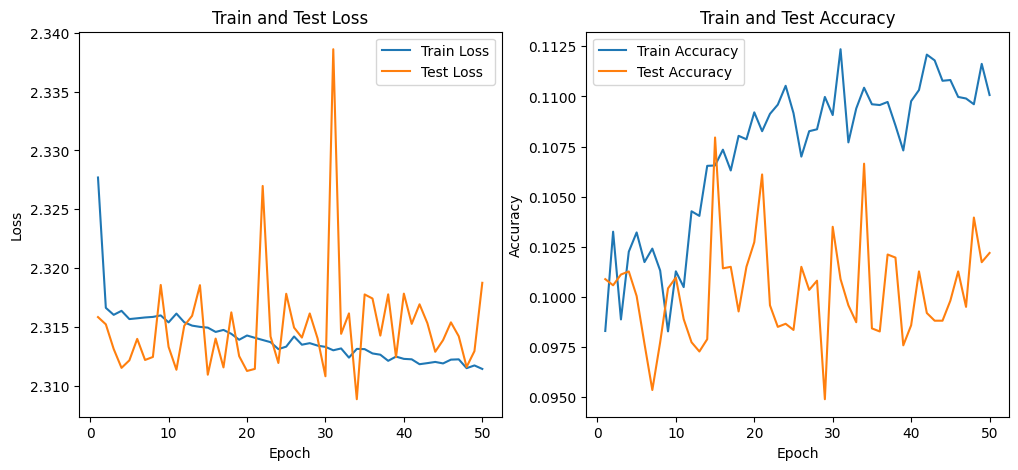

In [ ]:
print(device)

num_epochs = 50

# model = GCNClassifier(in_channels=240).to(device)
# model = GATClassifier(in_channels=240).to(device)
# model = SAGEClassifier(in_channels=240).to(device)
model = CHEBClassifier(in_channels=240).to(device)

optimizer = Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()

def calculate_accuracy(y_pred, y_true):
    predicted = torch.argmax(y_pred, 1)
    correct = (predicted == y_true).float().sum()
    return correct.item()  # Convert to Python scalar

# Lists to store metrics for plotting
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in tqdm(range(num_epochs)):
    model.train()
    total_loss = 0
    total_correct = 0
    all_labels = []
    all_preds = []

    for data in train_loader:
        data = data.to(device)
        data.edge_attr = data.edge_attr.view(-1)
        optimizer.zero_grad()

        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        loss = criterion(out, data.label.long())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += calculate_accuracy(out, data.label)
        all_labels.extend(data.label.cpu().numpy())
        all_preds.extend(torch.argmax(out, 1).cpu().numpy())

    train_loss = total_loss / len(train_loader)
    train_losses.append(train_loss)

    train_accuracy = total_correct / len(train_loader.dataset)
    train_accuracies.append(train_accuracy)

    train_confusion_matrix = confusion_matrix(all_labels, all_preds)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss}, Train Accuracy: {train_accuracy}")
    print("Train Confusion Matrix:\n", train_confusion_matrix)

    # Validation
    model.eval()
    test_loss = 0
    total_correct = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for data in test_loader:
            data = data.to(device)
            data.edge_attr = data.edge_attr.view(-1)
            out = model(data.x, data.edge_index, data.edge_attr, data.batch)
            loss = criterion(out, data.label.long())
            test_loss += loss.item()
            total_correct += calculate_accuracy(out, data.label)
            all_labels.extend(data.label.cpu().numpy())
            all_preds.extend(torch.argmax(out, 1).cpu().numpy())

    test_loss = test_loss / len(test_loader)
    test_losses.append(test_loss)

    test_accuracy = total_correct / len(test_loader.dataset)
    test_accuracies.append(test_accuracy)

    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for train and test losses
ax1.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
ax1.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Train and Test Loss')
ax1.legend()

# Plot for train and test accuracies
ax2.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
ax2.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Train and Test Accuracy')
ax2.legend()

plt.show()
